In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
data = {
    "Date": pd.date_range(start="2024-01-01", periods=20, freq='D'),
    "Close": [100, 102, 101, 105, 107, 110, 112, 115, 118, 120, 122, 121, 123, 126, 128, 127, 130, 133, 135, 137]
}
df = pd.DataFrame(data)
df.to_csv("stock_prices.csv", index=False)
print("Dataset saved as stock_prices.csv")

Dataset saved as stock_prices.csv


In [4]:
df

,Date,Close
0,2024-01-01,100
1,2024-01-02,102
2,2024-01-03,101
3,2024-01-04,105
4,2024-01-05,107
5,2024-01-06,110
6,2024-01-07,112
7,2024-01-08,115
8,2024-01-09,118
9,2024-01-10,120


In [5]:
df = pd.read_csv("stock_prices.csv", parse_dates=["Date"], index_col="Date")

In [7]:
df

,Close,MA_5,EMA_5
Date,,,
2024-01-01,100,NaN,100.000000
2024-01-02,102,NaN,100.666667
2024-01-03,101,NaN,100.777778
2024-01-04,105,NaN,102.185185
2024-01-05,107,103.0,103.790123
2024-01-06,110,105.0,105.860082
2024-01-07,112,107.0,107.906722
2024-01-08,115,109.8,110.271148
2024-01-09,118,112.4,112.847432


In [6]:
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()


In [8]:
train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]

model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test))


c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [9]:
ma_mse = mean_squared_error(test, df['MA_5'][train_size:])
ema_mse = mean_squared_error(test, df['EMA_5'][train_size:])
arima_mse = mean_squared_error(test, predictions)

print(f"MSE - Moving Average: {ma_mse:.4f}")
print(f"MSE - Exponential Moving Average: {ema_mse:.4f}")
print(f"MSE - ARIMA: {arima_mse:.4f}")


MSE - Moving Average: 17.1000
MSE - Exponential Moving Average: 15.6404
MSE - ARIMA: 6.4041


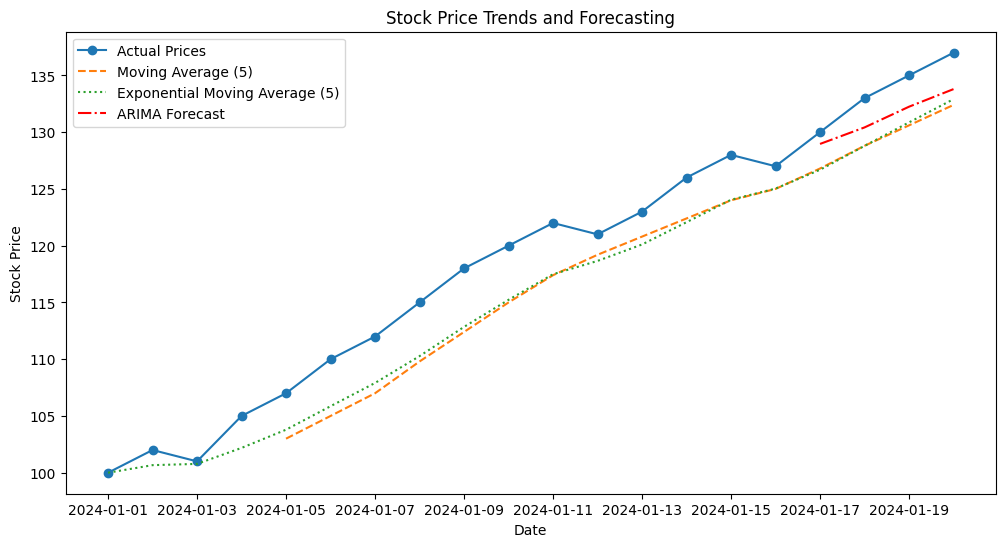

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], label='Actual Prices', marker='o')
plt.plot(df.index, df['MA_5'], label='Moving Average (5)', linestyle='dashed')
plt.plot(df.index, df['EMA_5'], label='Exponential Moving Average (5)', linestyle='dotted')
plt.plot(df.index[train_size:], predictions, label='ARIMA Forecast', linestyle='dashdot', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trends and Forecasting')
plt.show()

In [12]:
best_method = min((ma_mse, 'MA'), (ema_mse, 'EMA'), (arima_mse, 'ARIMA'))[1]
print(f"The best forecasting method based on MSE is: {best_method}")

The best forecasting method based on MSE is: ARIMA
